In [1]:
import os

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]='0'

os.environ["HF_HOME"]="~/codes/.cache/huggingface"

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
def show_images(images, scores, test_artist, train_artists):
    n: int = len(images)
    f = plt.figure(figsize=(16, 2))
    for i in range(n):
        # Debug, plot figure
        ax = f.add_subplot(1, n, i + 1)
        if i==0:
            pass
            ax.title.set_text(test_artist)
        else:
            ax.title.set_text(str(np.round(scores[i-1], 4))+'\n'+train_artists[i-1])
            ax.axis('off')
        if images[i]==None:
            pass
        else:
            plt.imshow(images[i])

    plt.show(block=True)

In [4]:
from datasets import load_dataset

In [5]:
import pickle

In [6]:
with open('../../data/indices/5000-0.5/idx-train.pkl', 'rb')  as handle:
    idx_train = pickle.load(handle)
len(idx_train)   

5000

In [7]:
with open('../../data/indices/5000-0.5/idx-val.pkl', 'rb')  as handle:
    idx_val = pickle.load(handle)
len(idx_val)

1000

In [8]:
import pandas as pd
df = pd.read_csv('../../../../codes/artbench/ArtBench-10.csv')
df.head()

,name,artist,url,is_public_domain,length,width,label,split,cifar_index
0,frank-omeara_towards-night-and-winter.jpg,frank-omeara,https://uploads5.wikiart.org/00316/images/fran...,True,800,657,impressionism,train,43186
1,goldstein-grigoriy_morning.jpg,goldstein-grigoriy,https://uploads5.wikiart.org/images/grigoriy-g...,True,521,499,impressionism,train,41151
2,georges-lemmen_man-reading.jpg,georges-lemmen,https://uploads6.wikiart.org/images/georges-le...,True,800,612,impressionism,train,9754
3,theodor-aman_port-of-constantza-1882.jpg,theodor-aman,https://uploads6.wikiart.org/images/theodor-am...,True,560,336,impressionism,train,44244
4,niccolo-cannicci_il-passo-della-futa-1914.jpg,niccolo-cannicci,https://uploads3.wikiart.org/images/niccolo-ca...,True,2400,2322,impressionism,train,46885


In [9]:
df['path'] = df.apply(lambda x: "../../../../codes/artbench/data/artbench-10-imagefolder/{}/{}".format(x['label'], x['name']), axis=1)
df.head()

,name,artist,url,is_public_domain,length,width,label,split,cifar_index,path
0,frank-omeara_towards-night-and-winter.jpg,frank-omeara,https://uploads5.wikiart.org/00316/images/fran...,True,800,657,impressionism,train,43186,../../../../codes/artbench/data/artbench-10-im...
1,goldstein-grigoriy_morning.jpg,goldstein-grigoriy,https://uploads5.wikiart.org/images/grigoriy-g...,True,521,499,impressionism,train,41151,../../../../codes/artbench/data/artbench-10-im...
2,georges-lemmen_man-reading.jpg,georges-lemmen,https://uploads6.wikiart.org/images/georges-le...,True,800,612,impressionism,train,9754,../../../../codes/artbench/data/artbench-10-im...
3,theodor-aman_port-of-constantza-1882.jpg,theodor-aman,https://uploads6.wikiart.org/images/theodor-am...,True,560,336,impressionism,train,44244,../../../../codes/artbench/data/artbench-10-im...
4,niccolo-cannicci_il-passo-della-futa-1914.jpg,niccolo-cannicci,https://uploads3.wikiart.org/images/niccolo-ca...,True,2400,2322,impressionism,train,46885,../../../../codes/artbench/data/artbench-10-im...


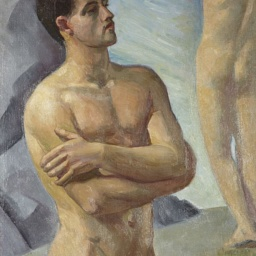

In [10]:
from datasets import Dataset, load_dataset, Image

train_dataset = Dataset.from_dict({"image": df.loc[idx_train]['path'].tolist(),
                                   "label": df.loc[idx_train]['label'].tolist(),
                                  }).cast_column("image", Image())
train_dataset[0]["image"]

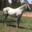

In [10]:
val_dataset =  dataset['test'].select(idx_val)
val_dataset[0]["img"]

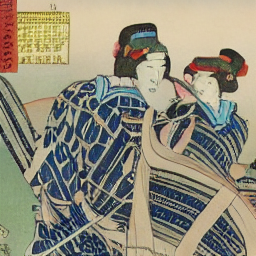

In [11]:
import pandas as pd
df = pd.DataFrame()
df['label'] = ['ukiyo_e']*500+['post_impressionism']*500
df['path'] = ['{}/{}.png'.format('../../saved/5000-0.5/gen', i) for i in range(1000)]

from datasets import DatasetDict, Dataset, load_dataset, Image
dataset = DatasetDict({
"train": Dataset.from_dict({
    "image": df['path'].tolist(),
    "label": df['label'].tolist(),
}).cast_column("image", Image()),})
gen_dataset = dataset["train"]
gen_dataset[0]["image"]

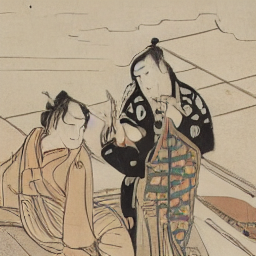

In [13]:
gen_dataset[2]["image"]

In [40]:
from sklearn.model_selection import train_test_split
_, test_index = train_test_split(range(1000), test_size=60, random_state=0)
test_index

[993,
 859,
 298,
 553,
 672,
 971,
 27,
 231,
 306,
 706,
 496,
 558,
 784,
 239,
 578,
 55,
 906,
 175,
 14,
 77,
 31,
 481,
 310,
 311,
 883,
 788,
 45,
 103,
 760,
 1,
 823,
 710,
 614,
 790,
 408,
 736,
 957,
 366,
 918,
 267,
 230,
 996,
 635,
 698,
 251,
 783,
 819,
 141,
 316,
 587,
 331,
 295,
 262,
 432,
 862,
 582,
 272,
 270,
 987,
 319]

In [41]:
with open("../../data/indices/5000-0.5/counter/idx-gen-sampled.pkl", 'wb') as handle:
    pickle.dump(test_index, handle)

In [42]:
test_index

[993,
 859,
 298,
 553,
 672,
 971,
 27,
 231,
 306,
 706,
 496,
 558,
 784,
 239,
 578,
 55,
 906,
 175,
 14,
 77,
 31,
 481,
 310,
 311,
 883,
 788,
 45,
 103,
 760,
 1,
 823,
 710,
 614,
 790,
 408,
 736,
 957,
 366,
 918,
 267,
 230,
 996,
 635,
 698,
 251,
 783,
 819,
 141,
 316,
 587,
 331,
 295,
 262,
 432,
 862,
 582,
 272,
 270,
 987,
 319]

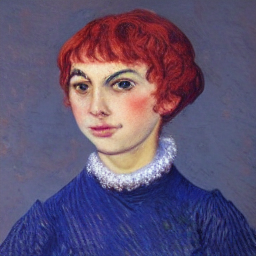

In [43]:
gen_dataset[test_index[0]]['image']

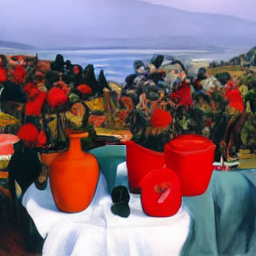

In [44]:
gen_dataset[test_index[1]]['image']

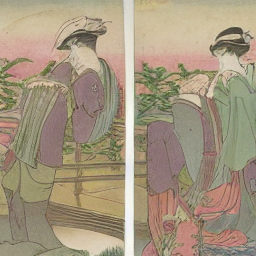

In [45]:
gen_dataset[test_index[2]]['image']

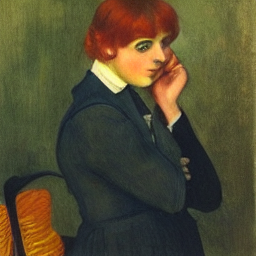

In [46]:
gen_dataset[test_index[3]]['image']

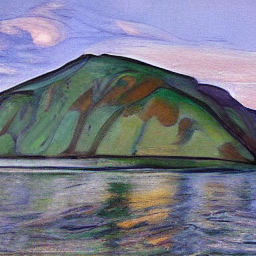

In [47]:
gen_dataset[test_index[4]]['image']

In [48]:
scores_list = []

In [49]:
with open("gen_5000_0.5_loss_100_5000000.0_0.20214663501351163.pkl", 'rb') as handle:
    scores = pickle.load(handle)
scores_list.append(scores)
scores.shape

(1000, 5000)

In [50]:
with open("gen_5000_0.5_mean-squared-l2-norm_100_5000000.0_0.2683277214572959.pkl", 'rb') as handle:
    scores = pickle.load(handle)
scores_list.append(scores)
scores.shape

(1000, 5000)

In [51]:
# load ground truth
my_list = [
    0,1,2,3,
    4,5,6,7,
    8,9,10,11,
    12,13,14,15,
    16,17,18,19,
    20,21,22,23,
    24,25,26,27,
    28,29,30,31,
    32,33,34,35,
    36,37,38,39,
    40,41,42,43,
    44,45,46,47,
    48,49,50,51,
    52,53,54,55,
    56,57,58,59,
    60,61,62,63,
          ]

In [52]:
loss_array_list = []

for i in my_list:
    for seed in [
        0,
                 1,
                 2,
                 # 3,
                 # 4,
                ]:
        for e_seed in [
            0, 
                       1, 
                       2
                      ]:
            with open('../../saved/5000-0.5/lds-val/sd-lora-sub-{}-{}/e-{}-gen.pkl'.format(i, seed, e_seed), 'rb')  as handle:
                loss_list = pickle.load(handle)
            margins = np.concatenate(loss_list, axis=-1) # -logp
            ####
            if (seed==0) and (e_seed)==0:
                loss_array = margins
            else:
                loss_array += margins
            
    loss_array = loss_array/(3*3)
    
    loss_array_list.append(loss_array)
lds_loss_array = np.stack(loss_array_list)
lds_loss_array.shape

(64, 1000, 1000)

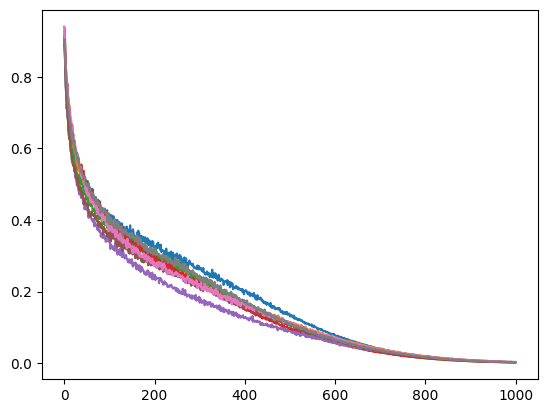

In [53]:
for i in range(1):
    for j in range(8):
        plt.plot(lds_loss_array[i, :, j], color="C{}".format(j))
    # break

In [54]:
mask_array_list = []

for i in my_list:
    # print(i)
    with open('../../data/indices/5000-0.5/lds-val/sub-idx-{}.pkl'.format(i), 'rb')  as handle:
        sub_idx_train = pickle.load(handle)
    # print(len(sub_idx_train))
    mask_array = np.in1d(idx_train, sub_idx_train)
        
    mask_array_list.append(mask_array)
    
lds_mask_array = np.stack(mask_array_list)
lds_mask_array.shape

(64, 5000)

In [55]:
lds_testset_correctness = lds_loss_array.mean(axis=1)
lds_testset_correctness.shape

(64, 1000)

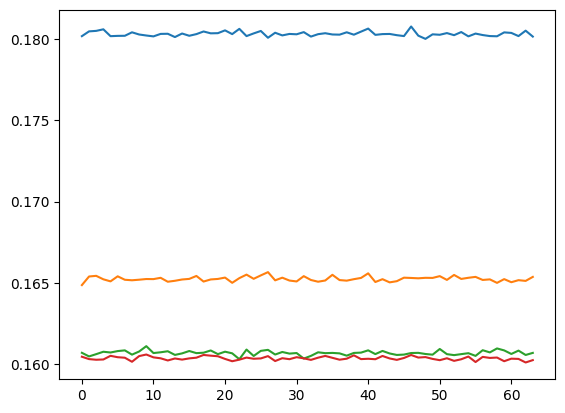

In [56]:
for j in range(4):
    plt.plot(lds_testset_correctness[:, j], color="C{}".format(j))
    # break
# plt.ylim(0.15, 0.2)

In [57]:
# compute lds
from scipy.stats import spearmanr, pearsonr
####
margins = lds_testset_correctness
infl_est_ = -scores_list[0]
# infl_est_ = -tmp
preds = lds_mask_array @ infl_est_.T
####
rs = []
ps = []

for ind in range(1000):
    r, p = spearmanr(preds[:, ind], margins[:, ind])
    # r, p = pearsonr(preds[:, ind], margins[:, ind])
    rs.append(r)
    ps.append(p)
    
rs, ps = np.array(rs), np.array(ps)
print(f'Correlation: {rs.mean():.3f} (avg p value {ps.mean():.6f})')

# tmp_1 = rs

Correlation: 0.202 (avg p value 0.215149)


In [58]:
# compute lds
from scipy.stats import spearmanr, pearsonr
####
margins = lds_testset_correctness
infl_est_ = -scores_list[0]
# infl_est_ = -tmp
preds = lds_mask_array @ infl_est_.T
####
rs = []
ps = []

for ind in test_index:
    r, p = spearmanr(preds[:, ind], margins[:, ind])
    # r, p = pearsonr(preds[:, ind], margins[:, ind])
    rs.append(r)
    ps.append(p)
    
rs, ps = np.array(rs), np.array(ps)
print(f'Correlation: {rs.mean():.3f} (avg p value {ps.mean():.6f})')

tmp_1 = rs

Correlation: 0.181 (avg p value 0.231867)


In [59]:
tmp_1

array([ 0.30819597,  0.2940052 ,  0.01369048,  0.3974359 ,  0.33379121,
        0.09228585,  0.32225275,  0.29793956,  0.11749084,  0.34551282,
        0.12225275,  0.23072344,  0.32174908,  0.26941392,  0.42422161,
        0.28578624,  0.16163004,  0.25274725,  0.31478938,  0.03026557,
        0.17261905,  0.23232601,  0.13489011,  0.11923077,  0.21776557,
        0.08978938,  0.06945971,  0.29166667,  0.20732601, -0.13978938,
        0.1275641 ,  0.09519231,  0.1242674 ,  0.18429487,  0.14207875,
        0.33228022,  0.23241758,  0.20361722,  0.24065934,  0.25636447,
        0.23113553, -0.02614469,  0.22403846,  0.18356227,  0.06011905,
        0.23978938,  0.15352564,  0.09510073,  0.11804029, -0.15499084,
        0.07376374,  0.2271978 ,  0.23049451,  0.03305861,  0.11105896,
        0.12893773,  0.19267399,  0.27907509,  0.06891026,  0.11346154])

In [60]:
# compute lds
from scipy.stats import spearmanr, pearsonr
####
margins = lds_testset_correctness
infl_est_ = -scores_list[1]
# infl_est_ = -tmp
preds = lds_mask_array @ infl_est_.T
####
rs = []
ps = []

for ind in range(1000):
    r, p = spearmanr(preds[:, ind], margins[:, ind])
    # r, p = pearsonr(preds[:, ind], margins[:, ind])
    rs.append(r)
    ps.append(p)
    
rs, ps = np.array(rs), np.array(ps)
print(f'Correlation: {rs.mean():.3f} (avg p value {ps.mean():.6f})')

# tmp_2 = rs

Correlation: 0.268 (avg p value 0.148249)


In [61]:
# compute lds
from scipy.stats import spearmanr, pearsonr
####
margins = lds_testset_correctness
infl_est_ = -scores_list[1]
# infl_est_ = -tmp
preds = lds_mask_array @ infl_est_.T
####
rs = []
ps = []

for ind in test_index:
    r, p = spearmanr(preds[:, ind], margins[:, ind])
    # r, p = pearsonr(preds[:, ind], margins[:, ind])
    rs.append(r)
    ps.append(p)
    
rs, ps = np.array(rs), np.array(ps)
print(f'Correlation: {rs.mean():.3f} (avg p value {ps.mean():.6f})')

tmp_2 = rs

Correlation: 0.284 (avg p value 0.168795)


In [62]:
tmp_2

array([ 0.1617674 ,  0.23111528,  0.22284799,  0.26153846,  0.44977106,
        0.08782152,  0.40325092,  0.18411172,  0.38804945,  0.41698718,
        0.20421245,  0.20929487,  0.31231685,  0.59674908,  0.08218864,
        0.39899724,  0.06314103,  0.29958791,  0.23832418,  0.48754579,
        0.45558608,  0.42119963,  0.1867674 ,  0.4081044 ,  0.10943223,
        0.22628205, -0.01341575,  0.34601648,  0.49432234,  0.06877289,
        0.52673993,  0.2717033 ,  0.45421245, -0.02632784,  0.12751832,
        0.33521062,  0.15695971,  0.16945971,  0.26886447,  0.48411172,
       -0.02335165,  0.04775641,  0.49519231,  0.26891026,  0.35700549,
        0.09413919,  0.36378205,  0.3882326 ,  0.2095696 ,  0.72138278,
        0.38447802, -0.01826923,  0.38626374,  0.0885989 ,  0.13054179,
        0.50837912,  0.34688645,  0.5577381 ,  0.20801282,  0.33040293])

In [63]:
scores_list[0][test_index].shape

(60, 5000)

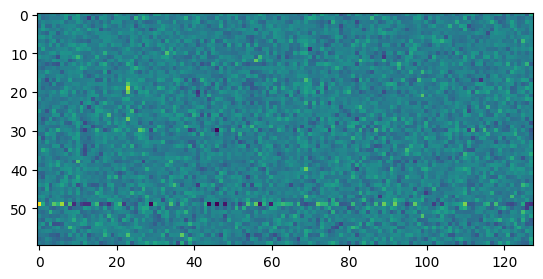

In [64]:
plt.imshow(scores_list[0][test_index][:, 0:128])

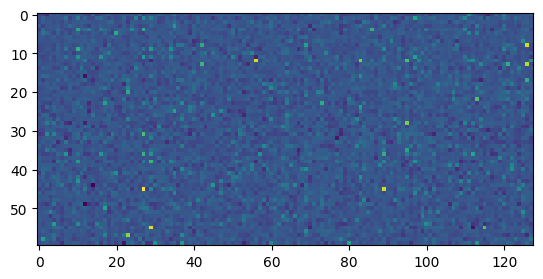

In [65]:
plt.imshow(scores_list[1][test_index][:, 0:128])

In [66]:
np.random.seed(42)
scores_list.append(np.random.rand(1000, 5000))
len(scores_list)

3

In [67]:
for index, my_i in enumerate(test_index):
    print(index, my_i)
    for k in [
        # 250, 
        500, 1000, 2500, 
              # 5000
             ]:
        D_trak=-scores_list[0][my_i]
        topK_trak = np.arange(10000)[D_trak.argsort()[0:k]]

        D_ours=-scores_list[1][my_i]
        topK_ours = np.arange(10000)[D_ours.argsort()[0:k]]

        ####
        D_random=-scores_list[2][my_i]
        topK_random = np.arange(10000)[D_random.argsort()[0:k]]
        ####

        # print(len(np.intersect1d(topK_trak, topK_ours)))
        # print(len(np.union1d(topK_trak, topK_ours)))
        print(len(np.intersect1d(topK_trak, topK_ours))/len(np.union1d(topK_trak, topK_ours))) # Jaccard similarity

        ####
        new_idx_trak = np.delete(idx_train, topK_trak)
        # print(len(new_idx_trak))
        print(new_idx_trak[0:5])

        with open("../../data/indices/5000-0.5/counter/{}-{}-TRAK.pkl".format(index, k), 'wb') as handle:
            pickle.dump(new_idx_trak, handle)
        ####
        new_idx_ours = np.delete(idx_train, topK_ours)
        # print(len(new_idx_ours))
        print(new_idx_ours[0:5])

        with open("../../data/indices/5000-0.5/counter/{}-{}-Ours.pkl".format(index, k), 'wb') as handle:
            pickle.dump(new_idx_ours, handle)
        ####
        new_idx_random = np.delete(idx_train, topK_random)
        # print(len(new_idx_random))
        print(new_idx_random[0:5])

        with open("../../data/indices/5000-0.5/counter/{}-{}-Random.pkl".format(index, k), 'wb') as handle:
            pickle.dump(new_idx_random, handle)

0 993
0.12612612612612611
[44104 44132 45049 54897 42530]
[44104 44132 45049 54897 42530]
[44132 45049 54897 42530 46662]
0.16686114352392065
[44104 44132 45049 54897 42530]
[44104 44132 45049 54897 42530]
[44132 54897 42530 46662 55330]
0.3717421124828532
[44132 45049 46662 42418 58526]
[44104 44132 45049 55330 46539]
[44132 42530 55330 46774 54646]
1 859
0.13895216400911162
[44104 44132 45049 54897 42530]
[44104 44132 45049 54897 42530]
[44104 44132 45049 54897 42530]
0.1876484560570071
[44132 45049 54897 42530 46662]
[44104 45049 54897 42530 46662]
[44104 44132 45049 54897 46662]
0.3804527885146328
[44132 45049 54897 42530 46662]
[44104 45049 54897 42530 46662]
[44104 44132 54897 46662 46539]
2 298
0.14285714285714285
[44104 44132 45049 54897 42530]
[44104 44132 45049 54897 42530]
[44132 45049 54897 42530 55330]
0.18906064209274673
[44104 44132 45049 54897 42530]
[44104 44132 45049 54897 42530]
[44132 54897 42530 46539 46774]
0.3815971262779773
[44104 45049 46539 46774 54646]
[44104